# Financial Indicators of US Stocks – Multiple Machine Learning Models Analysis

## Part 1 - Prepare the data

### Start by importing the data

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from autogluon.tabular import TabularPredictor, TabularDataset

# Show all columns and rows of the dataframes
pd.set_option('max_columns', None)

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
financial_df = pd.read_csv(Path("Resources/2018_Financial_Data.csv"))

# Review the DataFrame
financial_df.sample(50)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [3]:
len(financial_df)

4392

In [4]:
financial_df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2019 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

In [5]:
# Drop the name column as it won't be used.
financial_df = financial_df.drop(columns=['Unnamed: 0'])

### Clean the data

#### Remove rows with too many NaN

In [6]:
# Remove rows where more than 25% of the values are NaN.
num_columns = len(financial_df.columns)
max_nan_per_row = round(num_columns * 0.25)
threshold = num_columns - max_nan_per_row

financial_df = financial_df.dropna(axis=0, thresh=threshold)
financial_df = financial_df.reset_index(drop=True)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

#### Remove columns with too many NaN

In [7]:
# Remove columns where more than 25% of the rows have a NaN in that column.
num_rows = len(financial_df)
max_nan_per_col = round(num_rows * 0.25)
threshold = num_rows - max_nan_per_col

financial_df = financial_df.dropna(axis=1, thresh=threshold)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per

#### Remove rows with too many zeros

In [8]:
# Create a filter of what the percentage of nonzero value are in each row.
filter = (financial_df != 0).mean(axis=1)
filter

0       0.913876
1       0.956938
2       0.966507
3       0.928230
4       0.923445
          ...   
4128    0.669856
4129    0.779904
4130    0.875598
4131    0.617225
4132    0.808612
Length: 4133, dtype: float64

In [9]:
# Turn the filter into a boolean filter that chooses rows with at least 75% nonzero values.
filter = filter >= 0.75
filter

0        True
1        True
2        True
3        True
4        True
        ...  
4128    False
4129     True
4130     True
4131    False
4132     True
Length: 4133, dtype: bool

In [10]:
# Keep rows based on the boolean filter.
financial_df = financial_df.loc[filter]
financial_df = financial_df.reset_index(drop=True)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per

#### Remove columns with too many zeros

In [11]:
# Create a filter of what the percentage of nonzero value are in each column.
filter = (financial_df != 0).mean()
filter

Revenue                 0.999214
Revenue Growth          0.995545
Cost of Revenue         0.839623
Gross Profit            1.000000
R&D Expenses            0.333071
                          ...   
R&D Expense Growth      0.333071
SG&A Expenses Growth    0.974319
Sector                  1.000000
2019 PRICE VAR [%]      0.998428
Class                   0.703616
Length: 209, dtype: float64

In [12]:
# Create a list of categorical variables. 
categorical_variables = list(financial_df.dtypes[financial_df.dtypes == "object"].index)

# Display the categorical variables list.
categorical_variables

['Sector']

In [13]:
# Turn the filter into a boolean filter that chooses columns with at least 50% nonzero values.
filter = filter >= 0.50

# However, set categorical variables to true because we want to keep those no matter what the
# percentage of zero is.
for name in categorical_variables:
    filter.loc[name] = True

# Also set the target columns to true because we want to keep those as well.
filter.loc['2019 PRICE VAR [%]'] = True
filter.loc['Class'] = True
filter

Revenue                  True
Revenue Growth           True
Cost of Revenue          True
Gross Profit             True
R&D Expenses            False
                        ...  
R&D Expense Growth      False
SG&A Expenses Growth     True
Sector                   True
2019 PRICE VAR [%]       True
Class                    True
Length: 209, dtype: bool

In [14]:
# Keep columns based on the boolean filter.
financial_df = financial_df.loc[:, filter]
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.4507

### Encode categorical data

In [15]:
# Create a list of categorical variables. 
categorical_variables = list(financial_df.dtypes[financial_df.dtypes == "object"].index)

# Display the categorical variables list.
categorical_variables

['Sector']

In [16]:
# See if categorical variables have any NaN.
financial_df[categorical_variables].isnull().sum()

Sector    0
dtype: int64

In [17]:
# Create a OneHotEncoder instance.
enc = OneHotEncoder(sparse=False)

In [18]:
# Encode the categorcal variables using OneHotEncoder.
encoded_data = enc.fit_transform(financial_df[categorical_variables])

In [19]:
# Create a DataFrame with the encoded variables.
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names(categorical_variables))
encoded_df

,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Add the numerical variables from the original DataFrame to the one-hot encoded DataFrame.
encoded_df = pd.concat(
    [
        financial_df.drop(columns=categorical_variables),
        encoded_df
    ],
    axis=1
)
     
# Review the Dataframe
encoded_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class,Sector_Basic Materials,Sector_Communication Serv

### Separate the data into targets and feature data

In [21]:
# Create a target series for regression modeling.
y_regression = encoded_df['2019 PRICE VAR [%]']
y_regression

0        32.794573
1        40.588068
2        30.295514
3        64.213737
4        44.757840
           ...    
3811     -3.076927
3812     27.118650
3813    -77.922077
3814    -17.834400
3815    209.462222
Name: 2019 PRICE VAR [%], Length: 3816, dtype: float64

In [22]:
# Create a target series for classification modeling.
y_classification = encoded_df['Class']
y_classification

0       1
1       1
2       1
3       1
4       1
       ..
3811    0
3812    1
3813    0
3814    0
3815    1
Name: Class, Length: 3816, dtype: int64

In [23]:
# Create features dataframe for raw data features.
X_raw = encoded_df.drop(columns=['2019 PRICE VAR [%]', 'Class'])
X_raw.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cycl

In [24]:
# Identify 6 Key Financial Values/Ratios for a second features DataFrame.
key_financial_values = [
    'Working Capital',
    'quickRatio',
    'EPS',
    'priceEarningsRatio',
    'debtEquityRatio',
    'ROE'
]

# Create a features dataframe for Key Financial Values/Ratios.

X_key = encoded_df[key_financial_values]
X_key

,Working Capital,quickRatio,EPS,priceEarningsRatio,debtEquityRatio,ROE
0,-5.755000e+09,0.540449,2.56,13.3008,1.5604,0.1638
1,-1.835000e+09,0.632261,0.66,23.3030,1.1083,0.0478
2,1.216100e+10,1.105016,4.57,10.2691,0.3535,0.2824
3,1.028500e+10,2.134168,12.27,4.2999,0.1436,0.4377
4,NaN,1.402587,-2.62,0.0000,3.3440,-0.7216
...,...,...,...,...,...,...
3811,2.323907e+07,2.240921,0.37,18.6216,0.1756,0.0601
3812,7.759000e+06,1.231509,0.06,18.8333,0.1960,0.0109
3813,4.736000e+06,3.815356,-0.92,0.0000,1.1346,-1.6093
3814,2.521620e+07,1.189722,0.52,6.1538,0.5202,0.1895


### Split the features and target sets into training and testing datasets

In [25]:
# Split the preprocessed data into training and testing datasets for each feature and
# target set combination we have:
# X_raw
# X_key
# y_regression
# y_classification

X_raw_regr_train, X_raw_regr_test, y_raw_regr_train, y_raw_regr_test = train_test_split(
    X_raw, y_regression,
    random_state=1
)

X_key_regr_train, X_key_regr_test, y_key_regr_train, y_key_regr_test = train_test_split(
    X_key, y_regression,
    random_state=1
)

X_raw_class_train, X_raw_class_test, y_raw_class_train, y_raw_class_test = train_test_split(
    X_raw, y_classification,
    random_state=1
)

X_key_class_train, X_key_class_test, y_key_class_train, y_key_class_test = train_test_split(
    X_key, y_classification,
    random_state=1
)

### Convert remaining NaN values (final cleaning)

In [26]:
# Confirm target series for regression modeling does not have any NaN.
y_regression.isnull().sum()

0

In [27]:
# Confirm target series for classification modeling does not have any NaN.
y_classification.isnull().sum()

0

In [28]:
# See how many remaining NaN values are in the raw features DataFrame.
X_raw.isnull().sum().sum()

21088

In [29]:
# See how many remaining NaN values are in the key features DataFrame.
X_key.isnull().sum().sum()

844

In [30]:
# We can use describe to look at minimum values in each column.  If a lot of them are zero, then maybe
# imputing remaining NaNs with zeros could be a good choice.
X_raw.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cycl

In [31]:
# Because many of the min values are nonzero, we will go with another approach to dealing with NaN values.

#### Replace NaN values by imputing them with the mean for each column

In [32]:
# X_raw_regr_train, X_raw_regr_test

# Use the SimpleImputer to fill NaN values with the mean for each column.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_raw_regr_train)

# Impute the missing values into the training and test DataFrames.
X_raw_regr_train_i = X_imputer.transform(X_raw_regr_train)
X_raw_regr_test_i = X_imputer.transform(X_raw_regr_test)

In [33]:
# Review the data with imputed missing values as a DataFrame.
X_raw_regr_train_i_df = pd.DataFrame(X_raw_regr_train_i, columns=X_raw_regr_train.columns)
X_raw_regr_train_i_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cycl

In [34]:
# Check for any NaN to make sure it worked.
X_raw_regr_train_i_df.isnull().sum().sum()

0

In [35]:
# Check for any NaN to make sure it worked.
X_raw_regr_test_i_df = pd.DataFrame(X_raw_regr_test_i, columns=X_raw_regr_test.columns)
X_raw_regr_test_i_df.isnull().sum().sum()

0

In [36]:
# X_key_regr_train, X_key_regr_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_key_regr_train)

# Impute the missing values into the training and test DataFrames.
X_key_regr_train_i = X_imputer.transform(X_key_regr_train)
X_key_regr_test_i = X_imputer.transform(X_key_regr_test)

In [37]:
# X_raw_class_train, X_raw_class_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_raw_class_train)

# Impute the missing values into the training and test DataFrames.
X_raw_class_train_i = X_imputer.transform(X_raw_class_train)
X_raw_class_test_i = X_imputer.transform(X_raw_class_test)

In [38]:
# X_key_class_train, X_key_class_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_key_class_train)

# Impute the missing values into the training and test DataFrames.
X_key_class_train_i = X_imputer.transform(X_key_class_train)
X_key_class_test_i = X_imputer.transform(X_key_class_test)

### Scale the feature data by removing the mean and scaling to unit variance

In [39]:
# X_raw_regr_train, X_raw_regr_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_regr_train_i)

# Fit the scaler to the features training dataset
X_raw_regr_train_scaled = X_scaler.transform(X_raw_regr_train_i)
X_raw_regr_test_scaled = X_scaler.transform(X_raw_regr_test_i)

In [40]:
# Review the scaled training data as a DataFrame.
pd.DataFrame(X_raw_regr_train_scaled, columns=X_raw_regr_train.columns)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cycl

In [41]:
# X_key_regr_train, X_key_regr_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_regr_train_i)

# Fit the scaler to the features training dataset
X_key_regr_train_scaled = X_scaler.transform(X_key_regr_train_i)
X_key_regr_test_scaled = X_scaler.transform(X_key_regr_test_i)

In [42]:
# X_raw_class_train, X_raw_class_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_class_train_i)

# Fit the scaler to the features training dataset
X_raw_class_train_scaled = X_scaler.transform(X_raw_class_train_i)
X_raw_class_test_scaled = X_scaler.transform(X_raw_class_test_i)

In [43]:
# X_key_class_train, X_key_class_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_class_train_i)

# Fit the scaler to the features training dataset
X_key_class_train_scaled = X_scaler.transform(X_key_class_train_i)
X_key_class_test_scaled = X_scaler.transform(X_key_class_test_i)

### Scale the feature data to be within the range of 0 to 1

In [44]:
# X_raw_regr_train, X_raw_regr_test

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_regr_train_i)

# Fit the scaler to the features training dataset
X_raw_regr_train_scaled_mm = X_scaler.transform(X_raw_regr_train_i)
X_raw_regr_test_scaled_mm = X_scaler.transform(X_raw_regr_test_i)

In [45]:
# Review the scaled training data as a DataFrame.
pd.DataFrame(X_raw_regr_train_scaled_mm, columns=X_raw_regr_train.columns)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cycl

In [46]:
# X_key_regr_train, X_key_regr_test

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_regr_train_i)

# Fit the scaler to the features training dataset
X_key_regr_train_scaled_mm = X_scaler.transform(X_key_regr_train_i)
X_key_regr_test_scaled_mm = X_scaler.transform(X_key_regr_test_i)

In [47]:
# X_raw_class_train, X_raw_class_test

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_class_train_i)

# Fit the scaler to the features training dataset
X_raw_class_train_scaled_mm = X_scaler.transform(X_raw_class_train_i)
X_raw_class_test_scaled_mm = X_scaler.transform(X_raw_class_test_i)

In [48]:
# X_key_class_train, X_key_class_test

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_class_train_i)

# Fit the scaler to the features training dataset
X_key_class_train_scaled_mm = X_scaler.transform(X_key_class_train_i)
X_key_class_test_scaled_mm = X_scaler.transform(X_key_class_test_i)

## Part 2 - Use AutoGluon to clean and predict

### Separate the data into targets and feature data

In [49]:
# For this we go back to the financial dataframe where rows and columns with too many NaNs
# and zeros have been removed, but no replacement of NaN values or encoding of categorical
# data has been done. We will let AutoGluon handle the cleaning and encoding processes.

In [50]:
# Create target dataset.  We will use AutoGluon for classification only.
ag_y = financial_df['Class']

# Create features dataset.
ag_X = financial_df.drop(columns=['2019 PRICE VAR [%]', 'Class'])

### Split the features and target sets into training and testing datasets

In [51]:
# Split the data into training and testing datasets.
ag_X_train, ag_X_test, ag_y_train, ag_y_test = train_test_split(
    ag_X, ag_y,
    random_state=1
)

In [52]:
# Concatinate the features and target training data together again because AutoGluon expects
# them to be together when fitting.
ag_train = pd.concat([ag_X_train, ag_y_train], axis=1)
     
# Review the Dataframe.
ag_train.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),5Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Sector,Class
2159,2.114490e+08,0.3189,0.0,2.114490e+08,131678000.0,156009

### Use AutoGluon to fit multiple models

In [53]:
# Put training data that includes features and target label into an AutoGluon Dataset object.
train_data = TabularDataset(ag_train)

In [54]:
# Use the training data to fit multiple models.
ag_predictor = TabularPredictor(label='Class').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20210917_042949\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210917_042949\"
AutoGluon Version:  0.3.1
Train Data Rows:    2862
Train Data Columns: 195
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    974.48 MB
	Train Data (Original)  Memory Usage: 4.64 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of

### Make predictions

In [55]:
# Put test data that only contains features into an AutoGluon Dataset object.
test_data_no_label = TabularDataset(ag_X_test)

In [56]:
# Make predictions using the model.
ag_y_pred = ag_predictor.predict(test_data_no_label)

### Evaluate performance of the predictions

In [57]:
# Evaluate the predictions.
perf = ag_predictor.evaluate_predictions(
    y_true=ag_y_test,
    y_pred=ag_y_pred,
    auxiliary_metrics=True
)

Evaluation: accuracy on test data: 0.7431865828092243
Evaluations on test data:
{
    "accuracy": 0.7431865828092243,
    "balanced_accuracy": 0.6313957185247986,
    "mcc": 0.31490138590036953,
    "f1": 0.8323066392881587,
    "precision": 0.772554002541296,
    "recall": 0.9020771513353115
}


In [58]:
# Create a classification report for the AutoGluon predictions.
ag_training_report = classification_report(ag_y_test, ag_y_pred)

# Print the report.
print(ag_training_report)

              precision    recall  f1-score   support

           0       0.60      0.36      0.45       280
           1       0.77      0.90      0.83       674

    accuracy                           0.74       954
   macro avg       0.69      0.63      0.64       954
weighted avg       0.72      0.74      0.72       954



### Classification SVM Raw

In [59]:
# Create the classifier model using the raw data
svm_model = svm.SVC()

# Fit the model using X_raw_class_train_scaled & y_raw_class_train
svm_model = svm_model.fit(X_raw_class_train_scaled,y_raw_class_train)

# Use the trained model to predict the signals for the training data
training_raw_predictions = svm_model.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [60]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.54      0.14      0.22       280
           1       0.73      0.95      0.82       674

    accuracy                           0.71       954
   macro avg       0.63      0.55      0.52       954
weighted avg       0.67      0.71      0.65       954



### Classification SVM Raw with oversampling

In [61]:
# Count the distinct values
y_raw_class_train.value_counts()

1    2011
0     851
Name: Class, dtype: int64

In [62]:
# Resample the raw data
random_oversampler = RandomOverSampler(random_state=1)
X_raw_class_train_scaled_resampled, y_raw_class_train_resampled = random_oversampler.fit_resample(X_raw_class_train_scaled, y_raw_class_train)

In [63]:
# Count the distinct values
y_raw_class_train_resampled.value_counts()

0    2011
1    2011
Name: Class, dtype: int64

In [64]:
# Create the classifier model using the raw data
svm_model_resampled = svm.SVC()

# Fit the model using X_raw_class_train_scaled & y_raw_class_train
svm_model_resampled = svm_model_resampled.fit(X_raw_class_train_scaled_resampled,y_raw_class_train_resampled)

# Use the trained model to predict the signals for the training data
training_raw_predictions = svm_model_resampled.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions[0:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [65]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.46      0.72      0.56       280
           1       0.85      0.64      0.73       674

    accuracy                           0.67       954
   macro avg       0.65      0.68      0.64       954
weighted avg       0.73      0.67      0.68       954



### Classification SVM Key

In [66]:
# Create the classifier model using the key data
svm_model = svm.SVC()

# Fit the model using X_key_class_train_scaled & y_key_class_train
svm_model = svm_model.fit(X_key_class_train_scaled,y_key_class_train)

# Use the trained model to predict the trading signals for the training data
training_key_predictions = svm_model.predict(X_key_class_test_scaled)

# Display the sample predictions
training_key_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
# Evaluate the model using classification report
training_report = classification_report(y_key_class_test, training_key_predictions, zero_division=0)
print(training_report)

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       280
           1       0.71      1.00      0.83       674

    accuracy                           0.71       954
   macro avg       0.69      0.50      0.42       954
weighted avg       0.70      0.71      0.59       954



### Classification Random Forest Raw

In [68]:
# Create the classifier model using raw data
rfc_model = RandomForestClassifier()

# Fit the model using X_raw_class_scaled & y_raw_class_train
rfc_model = rfc_model.fit(X_raw_class_train_scaled,y_raw_class_train)

# Use the trained model to predict the trading signals for the training data
training_raw_predictions = rfc_model.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [69]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.62      0.38      0.47       280
           1       0.78      0.91      0.84       674

    accuracy                           0.75       954
   macro avg       0.70      0.64      0.65       954
weighted avg       0.73      0.75      0.73       954



### Classification Random Forest Raw with oversampling

In [70]:
# Create the classifier model using raw data
rfc_model = RandomForestClassifier()

# Fit the model using X_raw_class_scaled & y_raw_class_train
rfc_model = rfc_model.fit(X_raw_class_train_scaled_resampled,y_raw_class_train_resampled)

# Use the trained model to predict the trading signals for the training data
training_raw_predictions = rfc_model.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [71]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.58      0.47      0.52       280
           1       0.80      0.86      0.83       674

    accuracy                           0.75       954
   macro avg       0.69      0.66      0.67       954
weighted avg       0.73      0.75      0.74       954



### Classification Random Forest Key

In [72]:
# Create the classifier model using key data
rfc_model = RandomForestClassifier()

# Fit the model using X_key_class_scaled & y_key_class_train
rfc_model = rfc_model.fit(X_key_class_train_scaled,y_key_class_train)

# Use the trained model to predict the trading signals for the training data
training_raw_predictions = rfc_model.predict(X_key_class_test_scaled)

# Display the sample predictions
training_key_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
# Evaluate the model using classification report
training_report = classification_report(y_key_class_test, training_key_predictions, zero_division=0)
print(training_report)

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       280
           1       0.71      1.00      0.83       674

    accuracy                           0.71       954
   macro avg       0.69      0.50      0.42       954
weighted avg       0.70      0.71      0.59       954



## Create an AdaBoost Regression Model with the Original Data

In [74]:
# Instantiate the AdaBoost Regressor algorithm and fit to the raw key regression train dataset
# Assign a random_state parameter of 1 and n_estimators to 100
regr = AdaBoostRegressor(random_state=1, n_estimators=100)
regr.fit(X_raw_regr_train_scaled, y_raw_regr_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [75]:
# Return the coefficient of determination on the given raw regression test data 
regr.score(X_raw_regr_test_scaled, y_raw_regr_test)

-0.57193532905021

In [76]:
# Instantiate the AdaBoost Regressor algorithm and fit to the key regression train dataset
# Assign a random_state parameter of 1 and n_estimators to 100
regr = AdaBoostRegressor(random_state=1, n_estimators=100)
regr.fit(X_key_regr_train_scaled, y_key_regr_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [77]:
# Return the coefficient of determination on the given key regression test data 
regr.score(X_key_regr_test_scaled, y_key_regr_test)

-1.6260137253640794

## Make a Logistic Regression Model with the Original Data

In [78]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model and max_iter to 1000
logistic_regression_model = LogisticRegression(random_state=1, max_iter=1000)

In [79]:
# Fit the model
logistic_regression_model.fit(X_raw_class_train_scaled, y_raw_class_train)

LogisticRegression(max_iter=1000, random_state=1)

In [80]:
# Generate the testing predictions
testing_predictions = logistic_regression_model.predict(X_raw_class_test_scaled)

In [81]:
# Review the testing_report
testing_report = classification_report(y_raw_class_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.56      0.25      0.35       280
           1       0.75      0.92      0.82       674

    accuracy                           0.72       954
   macro avg       0.66      0.58      0.59       954
weighted avg       0.69      0.72      0.68       954



# Create a shallow (`1` hidden layer) neural network for classification with six key ratios data

### Compile the Model

In [82]:
# create an instance of the Sequential model 
nn_shallow_key = Sequential()

In [83]:
# create both an input layer containing two inputs and a hidden layer containing three neurons
number_inputs = 6
number_hidden_nodes = 3

nn_shallow_key.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))


In [84]:
# Add the output layer
nn_shallow_key.add(Dense(units=1, activation="sigmoid"))

In [85]:
# Display the Sequential model summary
nn_shallow_key.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compile the model by using the compile() function provided by Keras
nn_shallow_key.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Resample the key ratios data

In [87]:
# Count the distinct values
y_key_class_train.value_counts()

1    2011
0     851
Name: Class, dtype: int64

In [88]:
# Resample the key data
random_oversampler = RandomOverSampler(random_state=1)
X_key_class_train_scaled_resampled, y_key_class_train_resampled = random_oversampler.fit_resample(X_key_class_train_scaled, y_key_class_train)

In [89]:
# Count the distinct values
y_key_class_train_resampled.value_counts()

0    2011
1    2011
Name: Class, dtype: int64

### Fit and Evaluate the Neural Network with the scaled 6 key ratios training data

In [90]:
# Fitting the model with 100 epochs using the training data X_key_class_train_scaled
model_shallow_key = nn_shallow_key.fit(X_key_class_train_scaled_resampled, y_key_class_train_resampled, epochs=100)

Epoch 1/100
126/126 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5249
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5592
Epoch 3/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5860
Epoch 4/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5982
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5806
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5788
Epoch 7/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5930
Epoch 8/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5865
Epoch 9/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5820
Epoch 10/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6832 - accura

#### Plot the Loss and Accuracy

<AxesSubplot:>

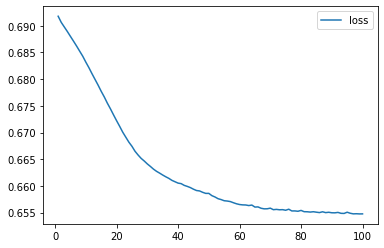

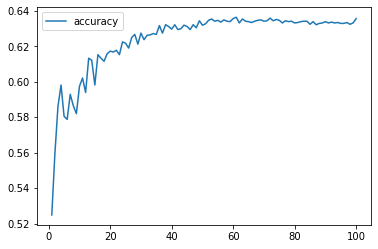

In [91]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_shallow_key = pd.DataFrame(model_shallow_key.history, index=range(1, len(model_shallow_key.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_shallow_key.plot(y="loss")

# Plot the accuracy
df_history_shallow_key.plot(y="accuracy")

#### Evaluate the model using testing data and the evaluate method.

In [92]:
# Evaluate shallow neural network using testing data
model_shallow_key_loss, model_shallow_key_accuracy = nn_shallow_key.evaluate(X_key_class_test_scaled, y_key_class_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_shallow_key_loss}, Accuracy: {model_shallow_key_accuracy}")

30/30 - 0s - loss: 0.6428 - accuracy: 0.6908
Loss: 0.6428238153457642, Accuracy: 0.6907756924629211


### Make predictions with the shallow neural network model

In [93]:
# Make predictions with the model
predictions_shallow_key = (nn_shallow_key.predict(X_key_class_test_scaled) > 0.5).astype("int32") 

In [94]:
# Create a DataFrame to compare the predictions with the actual values
results_shallow_key = pd.DataFrame({"predictions": predictions_shallow_key.ravel(), "actual": y_key_class_test})

# Display sample data
results_shallow_key.head(10)

,predictions,actual
1991,1,1
2330,1,1
1400,1,1
17,0,1
1684,0,1
3584,1,1
636,1,1
1965,1,1
1502,1,1
2681,0,0


In [95]:
#Print the confusion matrix
training_matrix_shallow_key = confusion_matrix(y_key_class_test, predictions_shallow_key)
print(training_matrix_shallow_key)

[[153 127]
 [168 506]]


In [96]:
# Save a classification report
training_report_shallow_key = classification_report(y_key_class_test, predictions_shallow_key)

# Then view its output
print(training_report_shallow_key)

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       280
           1       0.80      0.75      0.77       674

    accuracy                           0.69       954
   macro avg       0.64      0.65      0.64       954
weighted avg       0.70      0.69      0.70       954



# Create a deep neural network (`2` hidden layers) for classification with six key ratios data

### Compile the Model

In [97]:
# Define the model - deep neural net with two hidden layers
number_input_features = 6
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 2

# Create a sequential neural network model
nn_deep_key = Sequential()

# Add the first hidden layer
nn_deep_key.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_deep_key.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_deep_key.add(Dense(units=1, activation="sigmoid"))

In [98]:
# Compile the model
nn_deep_key.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit and Evaluate the Neural Network

In [99]:
# Fit the model
model_deep_key = nn_deep_key.fit(X_key_class_train_scaled_resampled, y_key_class_train_resampled, epochs=100)

Epoch 1/100
126/126 [==============================] - 1s 1ms/step - loss: 0.7125 - accuracy: 0.5264
Epoch 2/100
126/126 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.5269
Epoch 3/100
126/126 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.5495
Epoch 4/100
126/126 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.5577
Epoch 5/100
126/126 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.5512
Epoch 6/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.5825
Epoch 7/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5443
Epoch 8/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5622
Epoch 9/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5920
Epoch 10/100
126/126 [==============================] - 0s 1ms/step - loss: 0.6945 - accura

#### Plot the Loss and Accuracy

<AxesSubplot:>

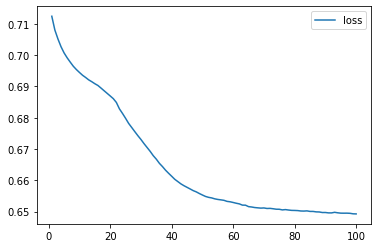

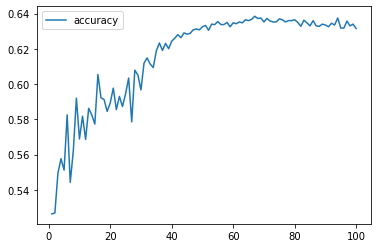

In [100]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_deep_key = pd.DataFrame(model_deep_key.history, index=range(1, len(model_deep_key.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_deep_key.plot(y="loss")

# Plot the accuracy
df_history_deep_key.plot(y="accuracy")

#### Evaluate the model using testing data and the evaluate method.

In [101]:
# Evaluate deep neural network model using testing data
model_deep_key_loss, model_deep_key_accuracy = nn_deep_key.evaluate(X_key_class_test_scaled, y_key_class_test, verbose=2)

30/30 - 0s - loss: 0.6446 - accuracy: 0.6971


### Make predictions with the shallow neural network model

In [102]:
# Make predictions with the model
predictions_deep_key = (nn_deep_key.predict(X_key_class_test_scaled) > 0.5).astype("int32") 

In [103]:
# Create a DataFrame to compare the predictions with the actual values
results_deep_key = pd.DataFrame({"predictions": predictions_deep_key.ravel(), "actual": y_key_class_test})

# Display sample data
results_deep_key.head(10)

,predictions,actual
1991,1,1
2330,1,1
1400,1,1
17,0,1
1684,0,1
3584,1,1
636,1,1
1965,1,1
1502,1,1
2681,0,0


In [104]:
#Print the confusion matrix
training_matrix_deep_key = confusion_matrix(y_key_class_test, predictions_deep_key)
print(training_matrix_deep_key)

[[148 132]
 [157 517]]


In [105]:
# Save a classification report
training_report_deep_key = classification_report(y_key_class_test, predictions_deep_key)

# Then view its output
print(training_report_deep_key)

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       280
           1       0.80      0.77      0.78       674

    accuracy                           0.70       954
   macro avg       0.64      0.65      0.64       954
weighted avg       0.71      0.70      0.70       954



# Create a shallow (`1` hidden layer) neural network for classification with raw data

### Compile the Model

In [106]:
# create an instance of the Sequential model 
nn_shallow_raw = Sequential()

In [107]:
# create both an input layer containing two inputs and a hidden layer containing three neurons
number_inputs = len(X_raw_class_train_scaled[0])
number_hidden_nodes = 140

nn_shallow_raw.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))


In [108]:
# Add the output layer
nn_shallow_raw.add(Dense(units=1, activation="sigmoid"))

In [109]:
# Display the Sequential model summary
nn_shallow_raw.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 140)               28840     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 141       
Total params: 28,981
Trainable params: 28,981
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Compile the model by using the compile() function provided by Keras
nn_shallow_raw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Resample the raw data using the data scaled between 0 and 1

In [111]:
# Count the distinct values
y_raw_class_train.value_counts()

1    2011
0     851
Name: Class, dtype: int64

In [112]:
# Resample the raw data
random_oversampler = RandomOverSampler(random_state=1)
X_raw_class_train_scaled_resampled_mm, y_raw_class_train_resampled_mm = random_oversampler.fit_resample(
    X_raw_class_train_scaled_mm, y_raw_class_train
)

In [113]:
# Count the distinct values
y_raw_class_train_resampled_mm.value_counts()

0    2011
1    2011
Name: Class, dtype: int64

### Fit and Evaluate the Neural Network with the scaled 6 key ratios training data

In [114]:
# Fitting the model with 100 epochs using the training data X_key_class_train_scaled
model_shallow_raw = nn_shallow_raw.fit(
    X_raw_class_train_scaled_resampled_mm,
    y_raw_class_train_resampled_mm,
    epochs=100
)

Epoch 1/100
126/126 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5811
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6206
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6208
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6430
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6387
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6492
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6539
Epoch 8/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6484
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6440
Epoch 10/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6242 - accura

#### Plot the Loss and Accuracy

<AxesSubplot:>

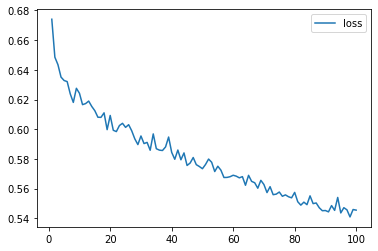

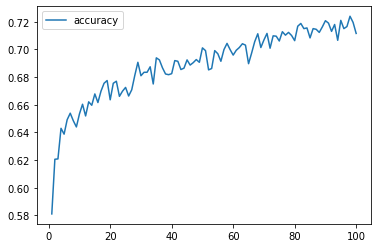

In [115]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_shallow_raw = pd.DataFrame(model_shallow_raw.history, index=range(1, len(model_shallow_raw.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_shallow_raw.plot(y="loss")

# Plot the accuracy
df_history_shallow_raw.plot(y="accuracy")

#### Evaluate the model using testing data and the evaluate method.

In [116]:
# Evaluate shallow neural network using testing data
model_shallow_raw_loss, model_shallow_raw_accuracy = nn_shallow_raw.evaluate(
    X_raw_class_test_scaled_mm, y_raw_class_test, verbose=2
)

# Display evaluation results
print(f"Loss: {model_shallow_raw_loss}, Accuracy: {model_shallow_raw_accuracy}")

30/30 - 0s - loss: 0.6434 - accuracy: 0.7034
Loss: 0.6433850526809692, Accuracy: 0.7033542990684509


### Make predictions with the shallow neural network model

In [117]:
# Make predictions with the model
predictions_shallow_raw = (nn_shallow_raw.predict(X_raw_class_test_scaled_mm) > 0.5).astype("int32") 

In [118]:
# Create a DataFrame to compare the predictions with the actual values
results_shallow_raw = pd.DataFrame({"predictions": predictions_shallow_raw.ravel(), "actual": y_raw_class_test})

# Display sample data
results_shallow_raw.head(10)

,predictions,actual
1991,1,1
2330,1,1
1400,1,1
17,1,1
1684,0,1
3584,1,1
636,1,1
1965,1,1
1502,1,1
2681,0,0


In [119]:
#Print the confusion matrix
training_matrix_shallow_raw = confusion_matrix(y_raw_class_test, predictions_shallow_raw)
print(training_matrix_shallow_raw)

[[180 100]
 [183 491]]


In [120]:
# Save a classification report
training_report_shallow_raw = classification_report(y_raw_class_test, predictions_shallow_raw)

# Then view its output
print(training_report_shallow_raw)

              precision    recall  f1-score   support

           0       0.50      0.64      0.56       280
           1       0.83      0.73      0.78       674

    accuracy                           0.70       954
   macro avg       0.66      0.69      0.67       954
weighted avg       0.73      0.70      0.71       954



# Create a deep (`2` hidden layers) neural network for classification with raw data

### Compile the Model

In [121]:
# Define the model - deep neural net with two hidden layers
number_input_features = len(X_raw_class_train_scaled[0])
hidden_nodes_layer1 = 105
hidden_nodes_layer2 = 55

# Create a sequential neural network model
nn_deep_raw = Sequential()

# Add the first hidden layer
nn_deep_raw.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_deep_raw.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_deep_raw.add(Dense(units=1, activation="sigmoid"))

In [122]:
# Compile the model
nn_deep_raw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit and Evaluate the Neural Network

In [123]:
# Fit the model
model_deep_raw = nn_deep_raw.fit(X_raw_class_train_scaled_resampled_mm, y_raw_class_train_resampled_mm, epochs=100)

Epoch 1/100
126/126 [==============================] - 1s 2ms/step - loss: 0.6796 - accuracy: 0.5704
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6109
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6353
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6323
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6447
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6571
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6507
Epoch 8/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6678: 0s - loss: 0.6260 - accuracy: 0.
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6619
Epoch 10/100
126/126 [==============================] - 0

#### Plot the Loss and Accuracy

<AxesSubplot:>

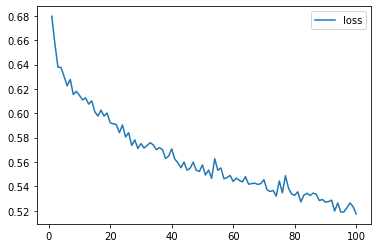

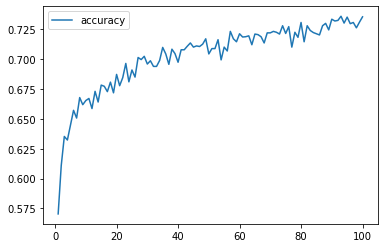

In [124]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_deep_raw = pd.DataFrame(model_deep_raw.history, index=range(1, len(model_deep_raw.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_deep_raw.plot(y="loss")

# Plot the accuracy
df_history_deep_raw.plot(y="accuracy")

#### Evaluate the model using testing data and the evaluate method.

In [125]:
# Evaluate deep neural network model using testing data
model_deep_raw_loss, model_deep_raw_accuracy = nn_deep_raw.evaluate(
    X_raw_class_test_scaled_mm, y_raw_class_test, verbose=2
)

30/30 - 0s - loss: 0.6790 - accuracy: 0.7034


### Make predictions with the deep neural network model

In [126]:
# Make predictions with the model
predictions_deep_raw = (nn_deep_raw.predict(X_raw_class_test_scaled_mm) > 0.5).astype("int32") 

In [127]:
# Create a DataFrame to compare the predictions with the actual values
results_deep_raw = pd.DataFrame({"predictions": predictions_deep_raw.ravel(), "actual": y_raw_class_test})

# Display sample data
results_deep_raw.head(10)

,predictions,actual
1991,1,1
2330,1,1
1400,0,1
17,1,1
1684,0,1
3584,1,1
636,1,1
1965,1,1
1502,1,1
2681,0,0


In [128]:
#Print the confusion matrix
training_matrix_deep_raw = confusion_matrix(y_raw_class_test, predictions_deep_raw)
print(training_matrix_deep_raw)

[[168 112]
 [171 503]]


In [129]:
# Save a classification report
training_report_deep_raw = classification_report(y_raw_class_test, predictions_deep_raw)

# Then view its output
print(training_report_deep_raw)

              precision    recall  f1-score   support

           0       0.50      0.60      0.54       280
           1       0.82      0.75      0.78       674

    accuracy                           0.70       954
   macro avg       0.66      0.67      0.66       954
weighted avg       0.72      0.70      0.71       954

